In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import pandas as pd
import re
import seaborn as sns

In [2]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(21, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

sc_class_labels= ['eosinophil granulocyte', 'reactive lymphocyte',
       'neutrophil granulocyte (segmented)', 'typical lymphocyte',
       'other', 'neutrophil granulocyte (band)', 'monocyte',
       'large granulated lymphocyte', 'atypical promyelocyte',
       'basophil granulocyte', 'smudge cell', 'neoplastic lymphocyte',
       'promyelocyte', 'myelocyte', 'myeloblast', 'metamyelocyte',
       'normo', 'plasma cell', 'hair cell', 'bilobed M3v',
       'mononucleosis']

aml_class_labels = ["CBFB_MYH11","control","NPM1","PML_RARA","RUNX1_RUNX1T1"]

# Path to the folder containing your files
data_path = '../../smalldataset/data'
result_path = '../../smalldataset/data/output'

../../smalldataset/data/CBFB_MYH11/AQK/single_cell_probabilities.npy
../../smalldataset/data/CBFB_MYH11/BJK/single_cell_probabilities.npy
../../smalldataset/data/CBFB_MYH11/BSN/single_cell_probabilities.npy
../../smalldataset/data/CBFB_MYH11/BTB/single_cell_probabilities.npy
../../smalldataset/data/CBFB_MYH11/DQV/single_cell_probabilities.npy


/tmp/ipykernel_2954/57833634.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))
/tmp/ipykernel_2954/57833634.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


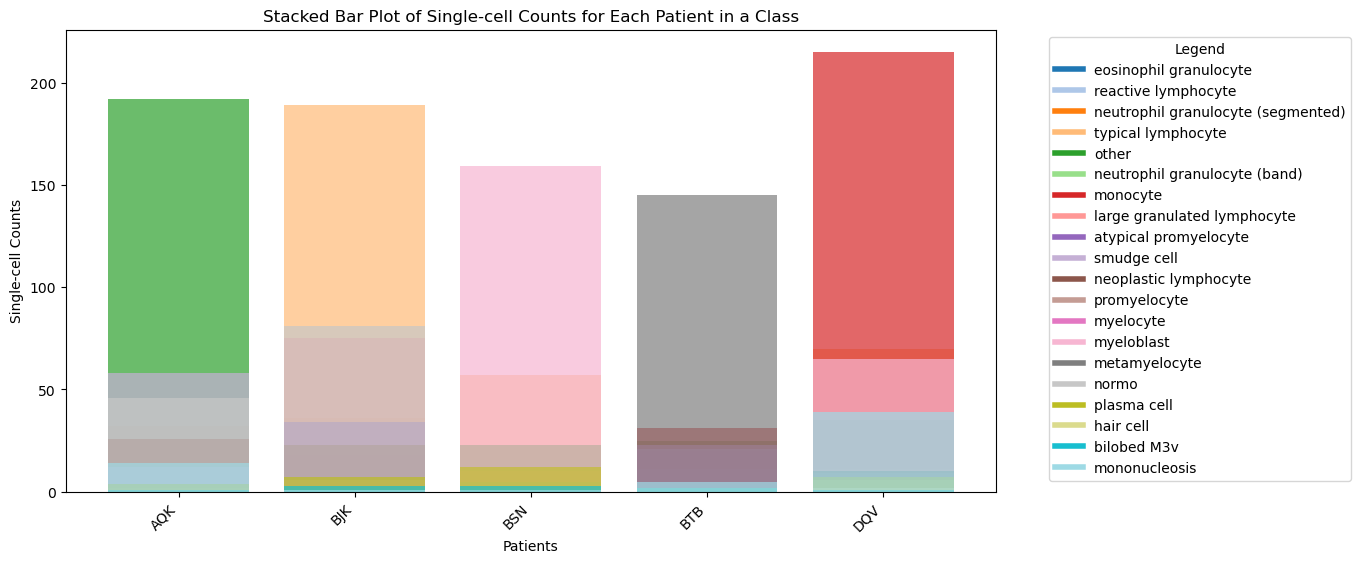

In [80]:
# Path to the folder containing your files
class_path = '../../smalldataset/data/CBFB_MYH11'

# Initialize lists to store data for plotting
patient_folder_names = []
stacked_counts_vectors = []

# Iterate over all files in the folder
for patient_folder in os.listdir(class_path):

    if(len(patient_folder)==3):
    
        probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

        print(probs_path)
        sc_probs = np.load(probs_path)
        sc_class= np.argmax(sc_probs, axis=1)
        counts_vector,unique_labels = get_counts_vector(sc_class)

        # Create a custom color list for each position
        cmap = get_cmap('tab20', len(unique_labels))
        colors = [cmap(i) for i in range(len(unique_labels))]
        
        # Append data for plotting
        patient_folder_names.append(patient_folder)
        stacked_counts_vectors.append((counts_vector, unique_labels, colors))

cmap = get_cmap('tab20')

# Create a stacked bar plot for each file
fig, ax = plt.subplots(figsize=(12, 6)) 
for i, (counts_vector, unique_labels, colors) in enumerate(stacked_counts_vectors):
    ax.bar(patient_folder_names[i], counts_vector[unique_labels], label=f"File {i + 1}", alpha=0.7, color=colors)

# Create a legend showing which color corresponds to which class label
legend_elements = [Line2D([0], [0], color=color, lw=4, label=sc_class_labels[label]) for label, color in zip(unique_labels, colors)]
ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and legend
ax.set_xlabel("Patients")
ax.set_ylabel("Single-cell Counts")
ax.set_title("Stacked Bar Plot of Single-cell Counts for Each Patient in a Class")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [81]:

probs_path = '../../smalldataset/data/CBFB_MYH11/AQK/single_cell_probabilities.npy'
print(probs_path)
sc_probs = np.load(probs_path)
sc_class= np.argmax(sc_probs, axis=1)
counts_vector,unique_labels = get_counts_vector(sc_class)
counts_vector

../../smalldataset/data/CBFB_MYH11/AQK/single_cell_probabilities.npy


array([  1,  18,  32, 192,  13,   1,  58,  26,  12,   0,   2,   0,   0,
         0,  46,   0,   0,   4,   1,   0,  14])

## Calculate Single Cell Classification counts 

In [4]:
def get_patient_name(path):
    return re.search(r"/data/\w+/([A-Z]{3})", path).group(1)

def get_class_name(path):
    return re.search(r"/data/(\w+)", path).group(1)

def get_image_number(path):
    return re.search(r"image_(\d).tif", path).group(1)

def get_classification_patient(patient_folder):
    probs_path = patient_folder + '/single_cell_probabilities.npy'
    sc_probs = np.load(probs_path)
    sc_class= np.argmax(sc_probs, axis=1)
    return sc_class

In [5]:
df = pd.DataFrame(columns=["patient","AML_subtype"]+sc_class_labels)
# Save class classification count for each patient in csv file
for folder_class in os.listdir(data_path):
    folder_class = os.path.join(data_path, folder_class)
    
    if os.path.isdir(folder_class):
       print(folder_class)
       for folder_patient in os.listdir(folder_class):
            folder_patient = os.path.join(folder_class, folder_patient)
            
            if os.path.isdir(folder_patient):
                if "single_cell_probabilities.npy" not in os.listdir(folder_patient):
                    print("Skipping patient folder without single_cell_probabilities.npy:", folder_patient)
                    continue
                sc_class = get_classification_patient(folder_patient)
                counts_vector,unique_labels = get_counts_vector(sc_class)
                df.loc[len(df)]=np.array([get_patient_name(folder_patient),get_class_name(folder_patient)]+counts_vector.tolist())

../../smalldataset/data/CBFB_MYH11
../../smalldataset/data/control
../../smalldataset/data/NPM1
../../smalldataset/data/output
Skipping patient folder without single_cell_probabilities.npy: ../../smalldataset/data/output/result_folder_1
../../smalldataset/data/PML_RARA
../../smalldataset/data/RUNX1_RUNX1T1


In [6]:
df[sc_class_labels]=df[sc_class_labels].astype(int)
df[["patient","AML_subtype"]]=df[["patient","AML_subtype"]].astype(str)

In [7]:
df.to_csv(result_path+"/single_cell_results.csv")

In [3]:
df = pd.read_csv(result_path+"/single_cell_results.csv",index_col = 0)

## Create plots with single cell classification counts

In [4]:
df_meanstd = df.groupby(["AML_subtype"]).agg(["mean","std"])
df_meanstd

/tmp/ipykernel_1111/3293518734.py:1: FutureWarning: ['patient'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_meanstd = df.groupby(["AML_subtype"]).agg(["mean","std"])


eosinophil granulocyte           reactive lymphocyte            \
                                mean       std                mean       std   
AML_subtype                                                                    
CBFB_MYH11                       1.2  0.836660                 7.0  7.141428   
NPM1                             4.6  5.412947                 4.6  6.542171   
PML_RARA                         1.4  1.516575                 2.8  3.346640   
RUNX1_RUNX1T1                    0.8  1.788854                 1.0  1.414214   
control                         11.6  5.549775                10.0  9.000000   

              neutrophil granulocyte (segmented)             \
                                            mean        std   
AML_subtype                                                   
CBFB_MYH11                                  16.8  16.284962   
NPM1                                        32.2  56.406560   
PML_RARA                                    12.6  11.148991   
RUNX1_RUNX1T1                               10.4  10.899541   
control                                    179.8  70.489006   

              typical lymphocyte            other             ... normo  \
                            mean        std  mean        std  ...  mean   
AML_subtype                                                   ...         
CBFB_MYH11                 105.6  79.651114  21.2  10.009995  ...   1.8   
NPM1                        77.0  64.074176  49.4  34.158454  ...  11.6   
PML_RARA                    39.8  56.459720  88.4  36.637413  ...   9.2   
RUNX1_RUNX1T1               75.8  79.678730  25.6  16.379866  ...   4.0   
control                     50.2  17.412639  66.4  47.395147  ...   0.8   

                         plasma cell            hair cell            \
                     std        mean        std      mean       std   
AML_subtype                                                           
CBFB_MYH11      2.489980         5.2   4.549725       1.2  0.836660   
NPM1           16.009372         7.8   6.180615       7.4  9.864076   
PML_RARA       16.709279         4.4   6.426508       2.4  3.361547   
RUNX1_RUNX1T1   3.535534        14.4  10.922454       3.2  3.114482   
control         1.788854         1.4   2.190890       0.8  0.447214   

              bilobed M3v            mononucleosis             
                     mean        std          mean        std  
AML_subtype                                                    
CBFB_MYH11            0.8   1.303840          11.8  16.177144  
NPM1                  2.8   2.588436          12.6  17.826946  
PML_RARA             16.0  28.956864           2.8   3.834058  
RUNX1_RUNX1T1        12.6  12.739702           5.0   4.795832  
control               0.0   0.000000           3.8   3.898718  

[5 rows x 42 columns]

### Plot mean and standard deviation for all AML subtypes

/tmp/ipykernel_1111/3896974255.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


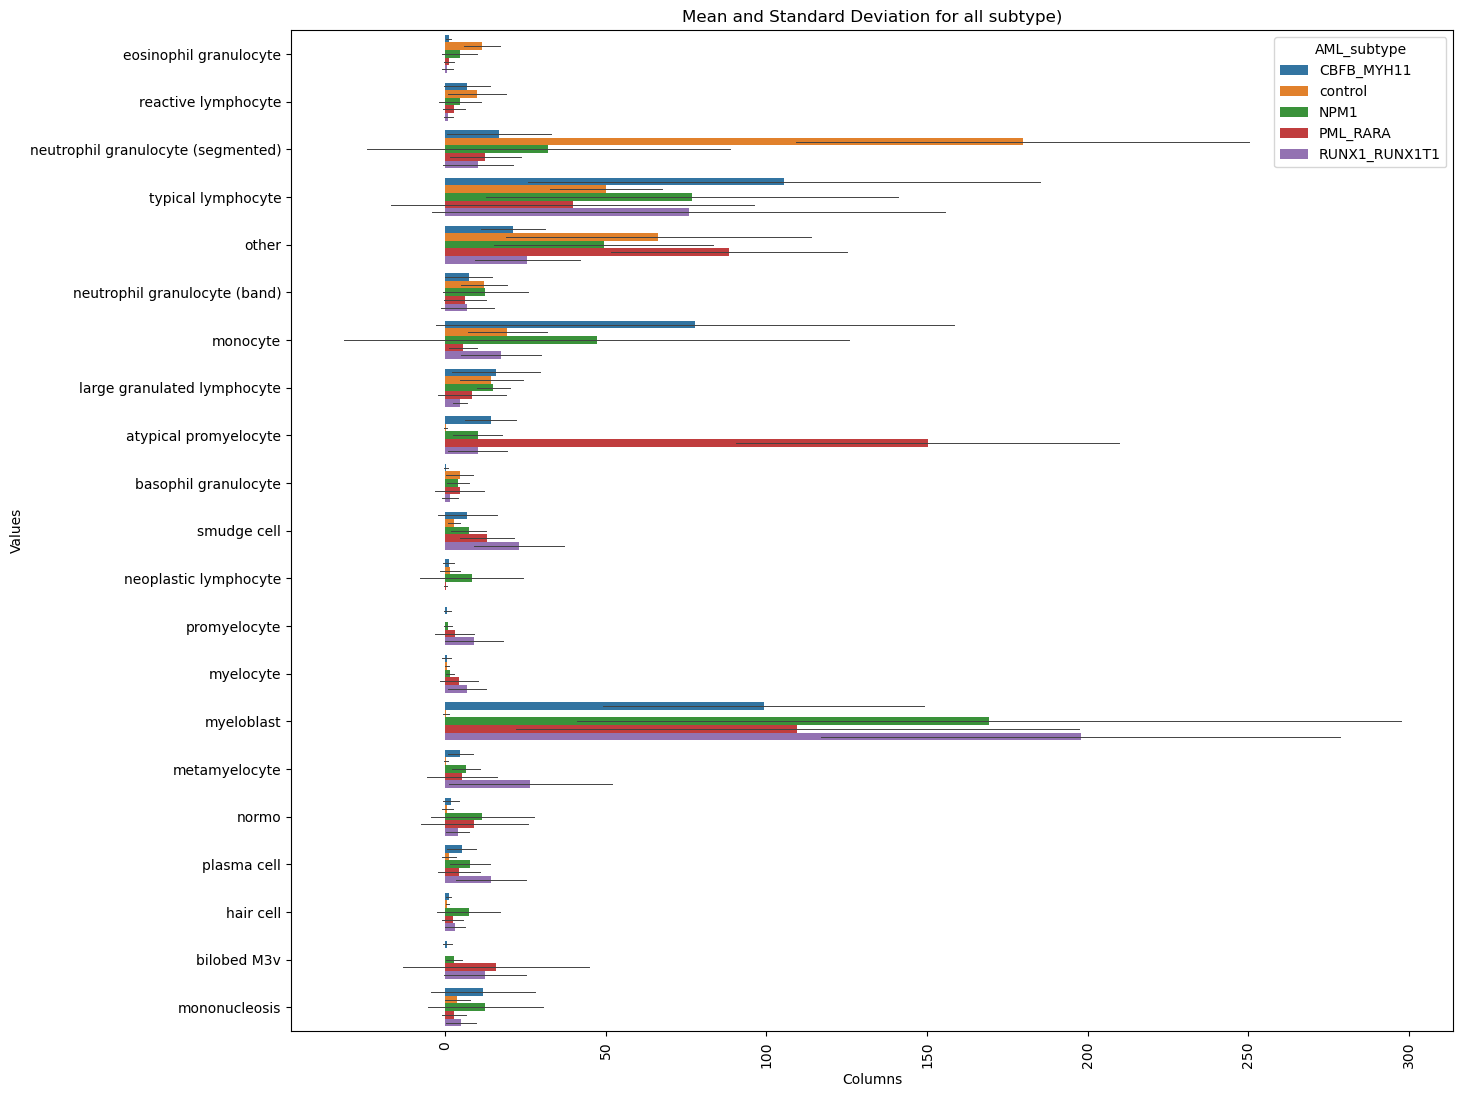

In [5]:
# Melt DataFrame to have a column for variable names
aml_class="NPM1"
mask = df["AML_subtype"]==aml_class
melted_df = pd.melt(df, id_vars=["AML_subtype"], value_vars=df.columns[1:])

# Plotting using seaborn
plt.figure(figsize=(15, 13))
sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)

# Set plot labels and title
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title(f"Mean and Standard Deviation for all subtype)")
plt.xticks(rotation=90)

# Show the plot
plt.show()


### Plot mean and standard deviation for each AML subtype individually

In [6]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


/tmp/ipykernel_1111/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


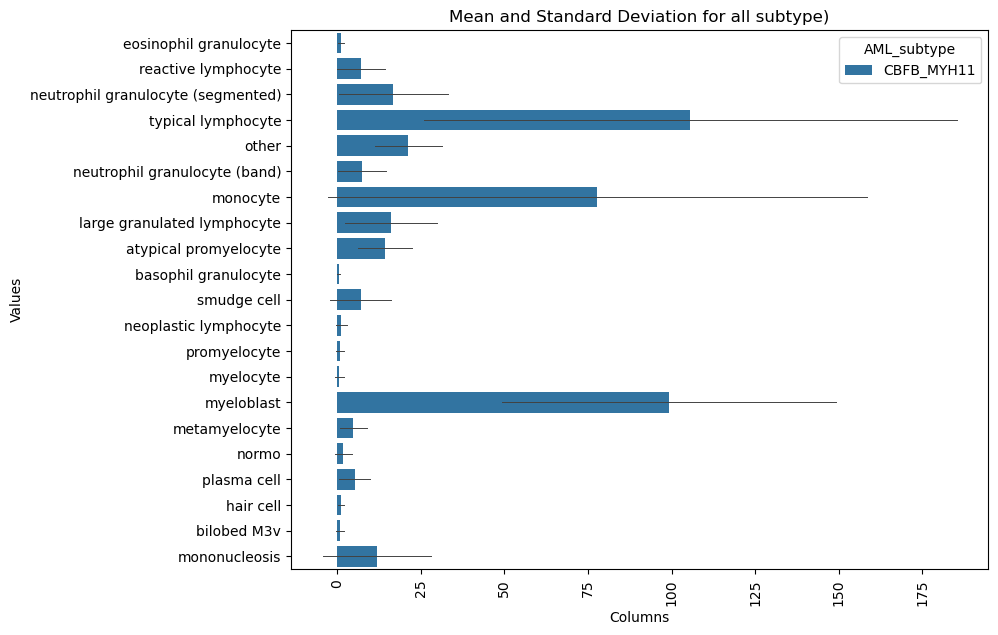

/tmp/ipykernel_1111/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


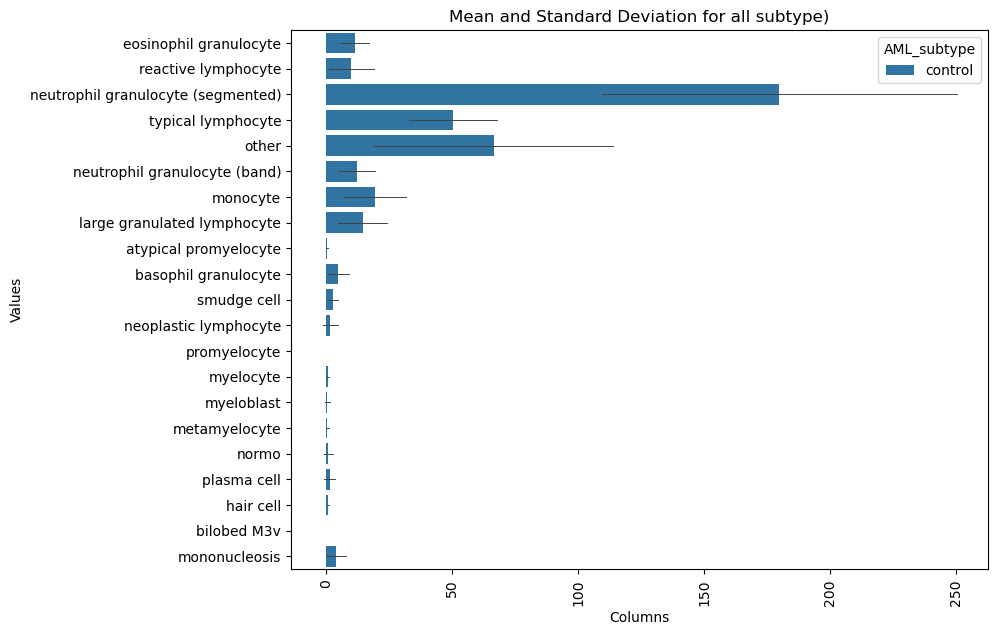

/tmp/ipykernel_1111/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


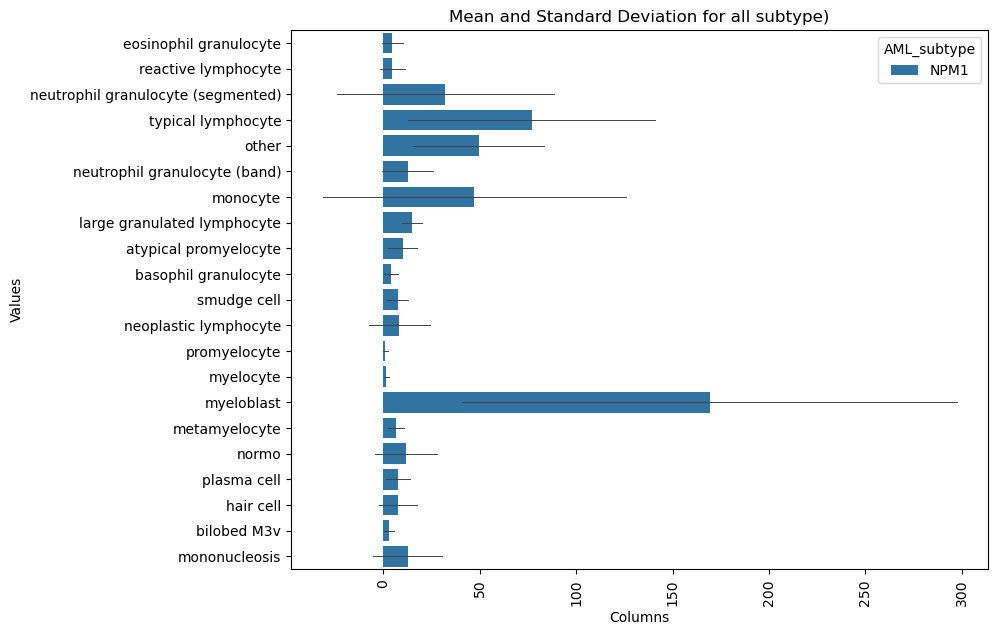

/tmp/ipykernel_1111/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


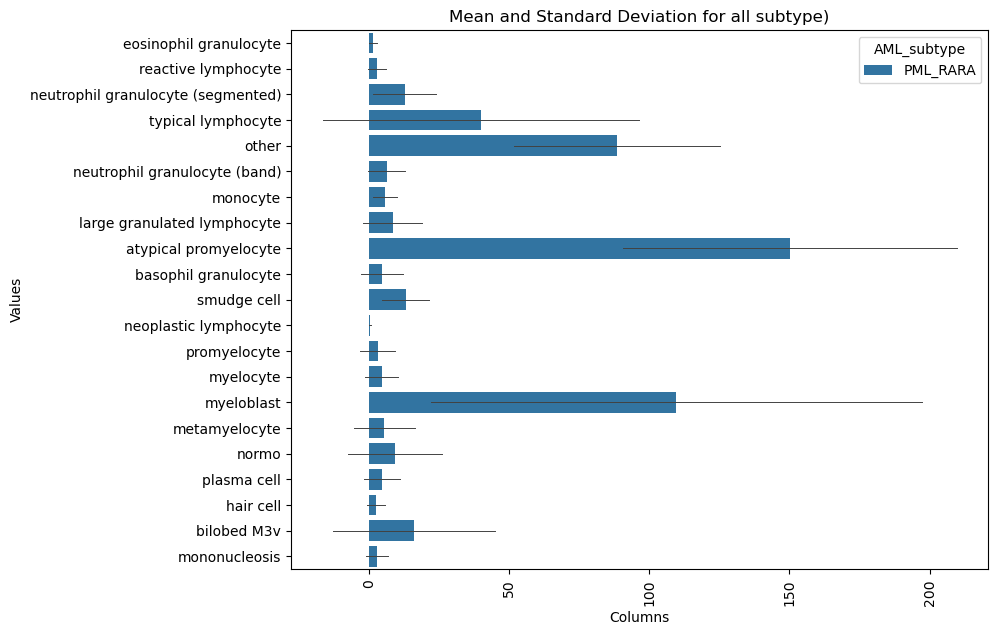

/tmp/ipykernel_1111/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


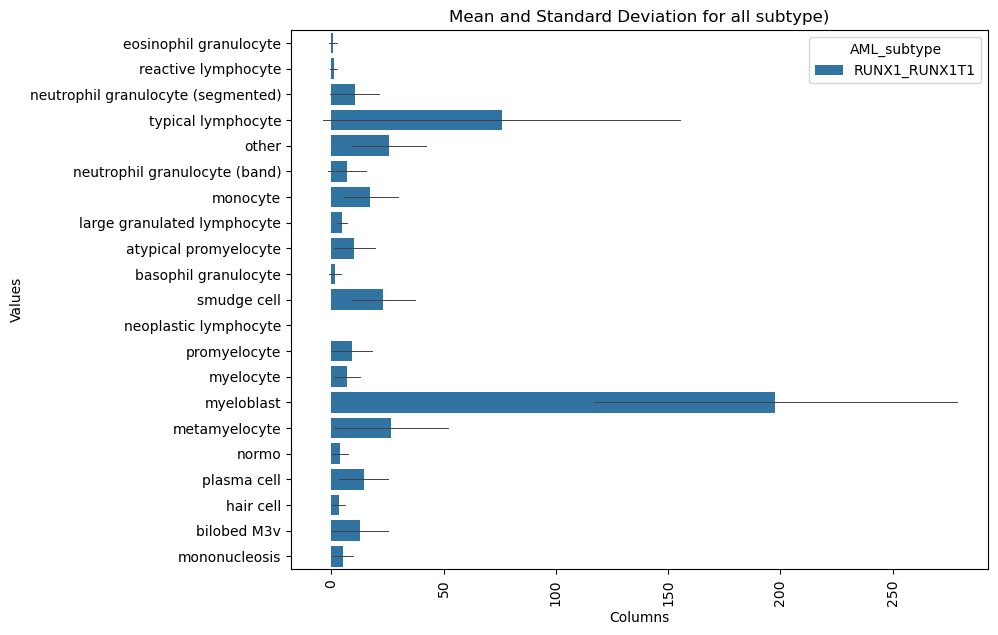

In [7]:
# Melt DataFrame to have a column for variable names
for i,aml_class in enumerate(aml_class_labels):
    mask = df["AML_subtype"]==aml_class
    melted_df = pd.melt(df[mask], id_vars=["AML_subtype"], value_vars=df.columns[1:])

    # Plotting using seaborn
    plt.figure(figsize=(9, 7))
    sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)

    # Set plot labels and title
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.title(f"Mean and Standard Deviation for all subtype)")
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()


## Sample patients

In [48]:
aml_subtype = 'RUNX1_RUNX1T1'
#Get average length of images
avg_nimages = int(df[sc_class_labels].sum(axis=1).mean())
var_nimages = int(df[sc_class_labels].sum(axis=1).std())
print(f"Average Length {avg_nimages}")
print(f"Standard deviation of length {var_nimages}")

Average Length 444
Standard deviation of length 87


#### Sample data with np.choice

In [92]:
#get ratio for each cell with mean and std
df_ratio = df.drop("patient",axis=1).copy()
df_ratio[sc_class_labels] = df[sc_class_labels].div(df[sc_class_labels].sum(axis=1), axis=0)
df_ratio_mean = df_ratio.groupby(["AML_subtype"]).agg(["mean","std"])
df_ratio_mean

eosinophil granulocyte           reactive lymphocyte            \
                                mean       std                mean       std   
AML_subtype                                                                    
CBFB_MYH11                  0.002755  0.001678            0.016490  0.016575   
NPM1                        0.009380  0.011062            0.009270  0.013125   
PML_RARA                    0.002842  0.003072            0.005665  0.006721   
RUNX1_RUNX1T1               0.001610  0.003599            0.002015  0.002850   
control                     0.031260  0.012482            0.023235  0.017343   

              neutrophil granulocyte (segmented)           typical lymphocyte  \
                                            mean       std               mean   
AML_subtype                                                                     
CBFB_MYH11                              0.037199  0.034566           0.247359   
NPM1                                    0.065431  0.114657           0.156127   
PML_RARA                                0.025608  0.022611           0.080357   
RUNX1_RUNX1T1                           0.021195  0.021650           0.153468   
control                                 0.469608  0.070978           0.134266   

                            other            ...     normo            \
                    std      mean       std  ...      mean       std   
AML_subtype                                  ...                       
CBFB_MYH11     0.164566  0.056639  0.029123  ...  0.004153  0.005183   
NPM1           0.129897  0.100001  0.068876  ...  0.023490  0.032401   
PML_RARA       0.113220  0.179741  0.072589  ...  0.018498  0.033456   
RUNX1_RUNX1T1  0.159726  0.056273  0.031887  ...  0.009112  0.007504   
control        0.026111  0.172765  0.110505  ...  0.002062  0.004610   

              plasma cell           hair cell           bilobed M3v            \
                     mean       std      mean       std        mean       std   
AML_subtype                                                                     
CBFB_MYH11       0.014018  0.015685  0.003029  0.002524    0.002427  0.004395   
NPM1             0.015831  0.012501  0.014922  0.019776    0.005673  0.005266   
PML_RARA         0.008963  0.013152  0.004911  0.006873    0.032758  0.059347   
RUNX1_RUNX1T1    0.032422  0.022755  0.007496  0.007008    0.025365  0.025638   
control          0.006133  0.011060  0.002522  0.001828    0.000000  0.000000   

              mononucleosis            
                       mean       std  
AML_subtype                            
CBFB_MYH11         0.026321  0.031733  
NPM1               0.025404  0.035754  
PML_RARA           0.005680  0.007779  
RUNX1_RUNX1T1      0.012711  0.013951  
control            0.011180  0.010963  

[5 rows x 42 columns]

In [146]:
#Sample data with np.choice and mean ratios for each plot
#Your observed class proportions (replace this with your actual data)
observed_class_proportions = df_ratio_mean.loc[aml_subtype,:].loc[:,"mean"].values
num_classes = len(observed_class_proportions)

num_samples = int(np.random.normal(loc=avg_nimages, scale=var_nimages))
print(f"Total number of samples: {num_samples}")

new_data = np.random.choice(sc_class_labels, size=num_samples, p=observed_class_proportions)

# Print the distribution of the new data
unique_classes, counts = np.unique(new_data, return_counts=True)
for cls, count in zip(unique_classes, counts):
    print(f"{count} \t  {cls}")

Total number of samples: 340
7 	  atypical promyelocyte
2 	  basophil granulocyte
7 	  bilobed M3v
2 	  hair cell
3 	  large granulated lymphocyte
16 	  metamyelocyte
27 	  monocyte
4 	  mononucleosis
151 	  myeloblast
5 	  myelocyte
5 	  neutrophil granulocyte (band)
4 	  neutrophil granulocyte (segmented)
3 	  normo
13 	  other
12 	  plasma cell
8 	  promyelocyte
1 	  reactive lymphocyte
18 	  smudge cell
52 	  typical lymphocyte


### Sample data with normal distribution

In [147]:
# Sample data with normal distribution
class_means = df_meanstd.loc[aml_subtype,:].loc[:,"mean"].values
class_variances = df_meanstd.loc[aml_subtype,:].loc[:,"std"].values

# Generate new data based on multivariate Gaussian distribution for each class
generated_data = np.random.normal(class_means,class_variances,21).astype(int)
generated_data = generated_data*(generated_data>0)

print(f"Total number of samples: {np.sum(generated_data)}")
for cls, count in zip(sc_class_labels, generated_data):
        print(f"{count} \t  {cls}")

Total number of samples: 461
0 	  eosinophil granulocyte
0 	  reactive lymphocyte
13 	  neutrophil granulocyte (segmented)
0 	  typical lymphocyte
26 	  other
0 	  neutrophil granulocyte (band)
16 	  monocyte
6 	  large granulated lymphocyte
13 	  atypical promyelocyte
0 	  basophil granulocyte
7 	  smudge cell
0 	  neoplastic lymphocyte
15 	  promyelocyte
5 	  myelocyte
291 	  myeloblast
22 	  metamyelocyte
12 	  normo
11 	  plasma cell
10 	  hair cell
14 	  bilobed M3v
0 	  mononucleosis
